# 

# Main script

### 0 - Data parsing

Q0.0: Are we able to parse the data with NumPy using genfromtxt?

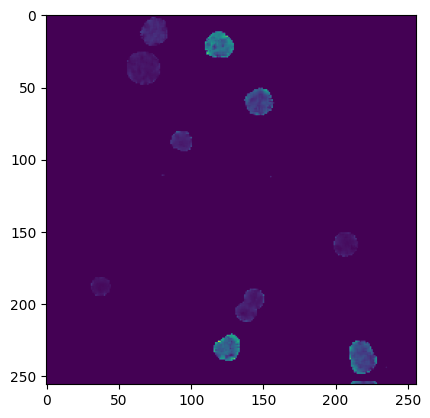

In [2]:
import numpy as np
import matplotlib.pyplot as plt
test_array1 = np.genfromtxt('Pollensample_0011_color coded value.asc', delimiter=' ')
np.max(test_array1)
plt.imshow(test_array1)

A0.0: Yes

Q0.1: Can we locate the data an put it into specific lists?

In [22]:
import os
#doing it this way should find the output_data folder on any OS type or file location
#pathlib
script_path = os.getcwd()
scr_scans_path = os.path.abspath(os.path.join(script_path, "..", "data", "09-08-22_FLIM", "SPC_analyzed", "output_data"))

#define path lists
color_coded_data_paths = []
chi_data_paths = []
photons_data_paths = []

#glob lib
#populate out path lists
for r, d, files in os.walk(scr_scans_path):
    for file in files:
        file_extension = file[-3:]
        if file_extension != "asc":
            continue #skip the non asc files
        full_file_path = os.path.join(scr_scans_path, file)
        if "_color coded value" in file:
            color_coded_data_paths.append(full_file_path)
            continue
        if "_chi" in file:
            chi_data_paths.append(full_file_path)
            continue
        if "_photons" in file:
            photons_data_paths.append(full_file_path)

#if you're want to see that it works, feel free to look
# print(f"{color_coded_data_paths = }")
# print(f"{chi_data_paths = }")
# print(f"{photons_data_paths = }")


A0.2: Yes

Q0.3: Can we process the data into NumPy arrays?

### 1 - Making a Mask

Q1.0: If we mask out all zeros, will the array be the same size between scans? (Will we have a consistant mask?)

In [2]:
test_array2 = np.genfromtxt('Pollensample_0061_color coded value.asc', delimiter=' ')
#np.max(test_array2) #the max value is different between the two. no suprise

#scikit-image (segementation)
#apply the mask to the first and then use that for the rest

def size(np_array):
    """Tells us the length of the array with all the zeros cut out."""
    no_zeros_array = np_array[np_array > 0]
    return np.size(no_zeros_array)

print(f'{size(test_array1) = } \n{size(test_array2) = }')

size(test_array1) = 2783 
size(test_array2) = 2797


A1.0: No. This means-
1. The boarders of the pollen grains change size between runs
2. Applying a constant mask will lose data

Q1.1: What our my options for masking? 

A1.1: I could create varriable mask sizes by over-defining the upper and lower bounds of the pollen grains, and then remove the leading/trailing zeros. (This seems the best to me right now, but I could be wrong.)

Q1.2: How do I mask the sets of overlapping pollen grains?

Skikit-image might allow me to mask out the pollen grains...
There's a lot to learn with skimage and masking. I might just manually mask in this situation, and then figure out segmenting another time. For now, I need to better understand matplotlib in order to figure out how to make the plots. That will help me the most in the long run.
Something I want to try though... I want to visualize where FLIM actually is different between runs. I want to make an array for each pixel, and measure the magnutude of differences. If a pixel is super different between runs, I'll color it red or something. Make a heat-map. 
Even if I get an array for each value of a given pixel over time... how will I measure/compare the magnitude of difference?
